In [1]:
# To import the google drive

from google.colab import drive

# To mount the drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Libraries to help load and manipulate the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library to help build the keras sequential model

import tensorflow as tf

# To import all the different layers and optimizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

In [4]:
# To load and read the labels data

labels = pd.read_csv("/content/drive/MyDrive/Labels2.csv")
labels


,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [5]:
# To load and read the images data

images= np.load("/content/drive/MyDrive/images2.npy")
images

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [6]:
# Library to help split data into train and test data

from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels)


In [7]:
# To check the dimension of the training images

train_images.shape

(3562, 128, 128, 3)

- The data is stored in a 4-dimensional NumPy Array. There are 3562 number of images in the training data, 128 number of pixels along the x-axis and 128 number of pixels along the y-axis, 3 is the total number of colour channels (Red, Green Blue Dimensions) in the images.

In [8]:
# To check the dimension of the test images

test_images.shape

(1188, 128, 128, 3)

There are 1188 number of images in the test data, 128 number of pixels along the x-axis and 128 number of pixels along the y-axis, 3 is the total number of colour channels (Red, Green Blue Dimensions) in the images.

In [9]:
# To know the dimension of the training labels

train_labels.shape

(3562, 1)

- The train label is 3562 by 1 dimension

In [10]:
# To know the dimension of the test labels

test_labels.shape

(1188, 1)

- The test label is 1188 by 1 dimension

In [11]:
# To check one of the images

train_images[2]

array([[[38, 67, 89],
        [38, 67, 89],
        [39, 68, 89],
        ...,
        [52, 58, 68],
        [49, 55, 65],
        [47, 52, 62]],

       [[36, 65, 89],
        [33, 63, 87],
        [34, 64, 87],
        ...,
        [56, 63, 71],
        [54, 61, 68],
        [53, 60, 68]],

       [[33, 63, 87],
        [31, 62, 86],
        [33, 63, 87],
        ...,
        [59, 67, 73],
        [57, 64, 71],
        [56, 64, 70]],

       ...,

       [[ 2, 27, 50],
        [12, 35, 60],
        [25, 49, 73],
        ...,
        [29, 50, 73],
        [26, 47, 70],
        [25, 46, 68]],

       [[ 1, 20, 45],
        [ 5, 25, 51],
        [16, 37, 63],
        ...,
        [28, 51, 74],
        [25, 48, 71],
        [28, 50, 73]],

       [[ 2, 19, 44],
        [ 3, 20, 46],
        [ 3, 23, 50],
        ...,
        [29, 51, 75],
        [27, 50, 74],
        [34, 55, 78]]], dtype=uint8)

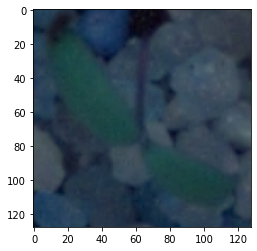

In [12]:
# To show one of the images

plt.imshow(train_images[2])

# Plot of the images from each class 

In [13]:
num_classes = 12

# creating a list of category names in alphabetical order
seedling12_classes = ["Black_grass", "Charlock", "Cleavers", "Common_Chickweed", "Common_Wheat", "Fat_Hen", "Loose_Silky-bent", "Maize",
                   "Scentless_Mayweed", "Shepherds_Purse", "Small_flowered_Cranesbill", "Sugar_beet"]

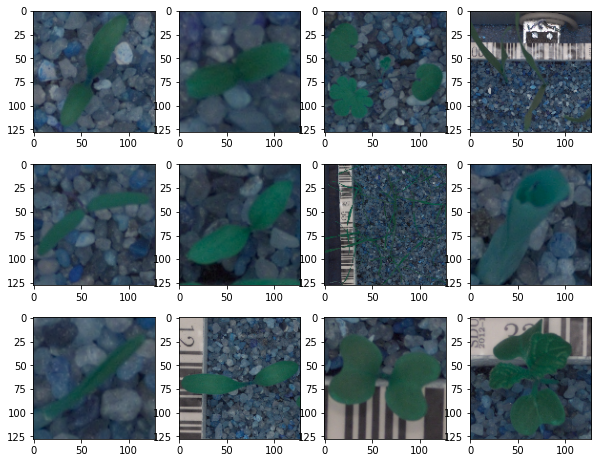

In [14]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(train_images[random_index, :])
        #ax.set_title(seedling12_classes[train_labels_encoded[random_index, 0]])
plt.show()

In [15]:
# To check the data types of the images

train_images.dtype

dtype('uint8')

- The data type is unsigned integer

# Data Preprocessing

In [16]:
# To convert the data types and normalize the images

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [17]:
# To create one-hot encoded representation for the labels

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
train_labels_encoded = enc.fit_transform(train_labels)
test_labels_encoded = enc.transform(test_labels)

In [18]:
# To check the dimension of the labels

train_labels_encoded.shape

(3562, 12)

- It is now 3562 by 12 dimensions

# The network architecture

In [19]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [20]:
# To instantiate the sequential model

model = Sequential()

# Add first conv layer with 64 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model.add(Conv2D(64, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model.add(BatchNormalization())

# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of the conv layer: pool_size of (2,2) and padding "same"
model.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model.add(BatchNormalization())

# Flattening the output of conv layer after max pooling to make it ready for dense connections
model.add(Flatten())

# Add a fully connected dense layer with 128 neurons
model.add(Dense(128, activation ="relu"))

# Add the output layer with 10 neurons with softmax as activation function as this is a multi_class classification problem
model.add(Dense(12, activation ="softmax"))



# To compile the model

In [21]:
# To compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [22]:
# To check the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

- There are 2,118,636 parameters produced by the model

# To train the model

In [23]:
history = model.fit(train_images, train_labels_encoded, epochs =25, batch_size =128, validation_split=0.2)

Epoch 1/25
23/23 [==============================] - 16s 156ms/step - loss: 1.9151 - accuracy: 0.4194 - val_loss: 2.8358 - val_accuracy: 0.0519
Epoch 2/25
23/23 [==============================] - 2s 87ms/step - loss: 0.5129 - accuracy: 0.8336 - val_loss: 3.7549 - val_accuracy: 0.0519
Epoch 3/25
23/23 [==============================] - 2s 87ms/step - loss: 0.1432 - accuracy: 0.9631 - val_loss: 4.0112 - val_accuracy: 0.1178
Epoch 4/25
23/23 [==============================] - 2s 87ms/step - loss: 0.0409 - accuracy: 0.9944 - val_loss: 4.2742 - val_accuracy: 0.1178
Epoch 5/25
23/23 [==============================] - 2s 87ms/step - loss: 0.0220 - accuracy: 0.9975 - val_loss: 5.1509 - val_accuracy: 0.0785
Epoch 6/25
23/23 [==============================] - 2s 88ms/step - loss: 0.0114 - accuracy: 0.9996 - val_loss: 6.3302 - val_accuracy: 0.0827
Epoch 7/25
23/23 [==============================] - 2s 87ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 6.9208 - val_accuracy: 0.0659
Epoch 8/25


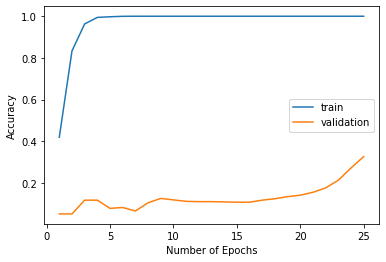

In [24]:
# To visualise the model's performance

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [25]:
# To evaluate model on test set

model.evaluate(test_images, test_labels_encoded)

38/38 [==============================] - 1s 10ms/step - loss: 4.5332 - accuracy: 0.2946


[4.533249378204346, 0.2946127951145172]

- The test performance gives 2.9 loss and 16% accuracy

# To imporve the model's performances

In [26]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [27]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [28]:
# To instantiate the sequential model

model2 = Sequential()

# Add first conv layer with 64 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model2.add(Conv2D(64, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of second conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of third conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the fourth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of fourth conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the fifth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of fifth conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the sixth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of sixth conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the seventh conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of seventh conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Flattening the output of conv layer after max pooling to make it ready for dense connections
model2.add(Flatten())

# Add a fully connected dense layer with 128 neurons
model2.add(Dense(128, activation ="relu"))

# Add 30% dropout layer (2x)
model2.add(Dropout(0.30))

# Add another fully connected dense layer with 128 neurons
model2.add(Dense(128, activation ="relu"))

# Add another dropout layer
model2.add(Dropout(0.30))


# Add the output layer with 10 neurons with softmax as activation function as this is a multi_class classification problem
model2.add(Dense(12, activation ="softmax"))

In [29]:
# To check the model summary

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

- There are 68,492 parameters produced by the model

In [30]:
# To compile the model
model2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
# To train the model

history2 = model2.fit(train_images, train_labels_encoded, epochs =25, batch_size =128, validation_split=0.2)

Epoch 1/25
23/23 [==============================] - 4s 116ms/step - loss: 2.3935 - accuracy: 0.1766 - val_loss: 2.4655 - val_accuracy: 0.1080
Epoch 2/25
23/23 [==============================] - 2s 90ms/step - loss: 1.9901 - accuracy: 0.3226 - val_loss: 2.4427 - val_accuracy: 0.1094
Epoch 3/25
23/23 [==============================] - 2s 90ms/step - loss: 1.6188 - accuracy: 0.4538 - val_loss: 2.5317 - val_accuracy: 0.1473
Epoch 4/25
23/23 [==============================] - 2s 90ms/step - loss: 1.3283 - accuracy: 0.5458 - val_loss: 3.0955 - val_accuracy: 0.1473
Epoch 5/25
23/23 [==============================] - 2s 97ms/step - loss: 1.1298 - accuracy: 0.6016 - val_loss: 3.9760 - val_accuracy: 0.1473
Epoch 6/25
23/23 [==============================] - 2s 94ms/step - loss: 0.9529 - accuracy: 0.6799 - val_loss: 4.5862 - val_accuracy: 0.1473
Epoch 7/25
23/23 [==============================] - 2s 90ms/step - loss: 0.8128 - accuracy: 0.7174 - val_loss: 6.7047 - val_accuracy: 0.1473
Epoch 8/25
2

# To visualise the model2's performance

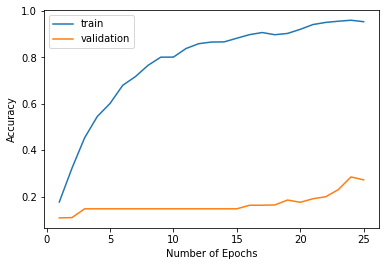

In [32]:
from IPython.core.history import HistoryAccessor
# To visualise the model2's performance

acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [33]:
# To evaluate model on test set

model2.evaluate(test_images, test_labels_encoded)

38/38 [==============================] - 0s 10ms/step - loss: 4.2284 - accuracy: 0.2576


[4.228387832641602, 0.25757575035095215]

- The test performance gives 2.4 loss and 7% accuracy

# Using early stopping to imporve the performance of the model

In [34]:
# To clear the backend
backend.clear_session()

In [35]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [36]:
# Library to import earlystopping

from tensorflow.keras.callbacks import EarlyStopping


In [37]:
# To create an instant of the early stopping

early_stopping = EarlyStopping(monitor="val_accuracy", patience= 6)

In [38]:
# To instantiate the sequential model

model3 = Sequential()

# Add first conv layer with 64 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model3.add(Conv2D(64, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of second conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of third conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Add the fourth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of fourth conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Add the fifth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of fifth conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Flattening the output of conv layer after max pooling to make it ready for dense connections
model3.add(Flatten())

# Add a fully connected dense layer with 64 neurons
model3.add(Dense(128, activation ="relu"))

# Add dropout layer
model3.add(Dropout(0.30))

# Add another fully connected dense layer with 64 neurons
model3.add(Dense(128, activation ="relu"))

# Add another dropout layer
model3.add(Dropout(0.30))

# Add the third fully connected dense layer with 64 neurons
model3.add(Dense(128, activation ="relu"))

# Add the third dropout layer
model3.add(Dropout(0.30))


# Add the output layer with 10 neurons with softmax as activation function as this is a multi_class classification problem
model3.add(Dense(12, activation ="softmax"))


In [39]:
# To check the model summary

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

- There are 80,460 parameters produced by the model

In [40]:
# To compile the model
model3.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [41]:
# To train the model

history3 = model3.fit(train_images, train_labels_encoded, epochs =40, batch_size =64, validation_split=0.2, callbacks=early_stopping)

Epoch 1/40
45/45 [==============================] - 5s 64ms/step - loss: 2.4981 - accuracy: 0.1369 - val_loss: 2.4555 - val_accuracy: 0.1080
Epoch 2/40
45/45 [==============================] - 2s 52ms/step - loss: 2.0208 - accuracy: 0.3166 - val_loss: 2.4373 - val_accuracy: 0.1473
Epoch 3/40
45/45 [==============================] - 2s 49ms/step - loss: 1.5791 - accuracy: 0.4517 - val_loss: 3.1768 - val_accuracy: 0.1473
Epoch 4/40
45/45 [==============================] - 2s 49ms/step - loss: 1.3085 - accuracy: 0.5511 - val_loss: 6.5260 - val_accuracy: 0.1473
Epoch 5/40
45/45 [==============================] - 2s 48ms/step - loss: 1.1245 - accuracy: 0.6153 - val_loss: 6.6930 - val_accuracy: 0.1473
Epoch 6/40
45/45 [==============================] - 2s 51ms/step - loss: 0.9722 - accuracy: 0.6718 - val_loss: 7.8939 - val_accuracy: 0.1473
Epoch 7/40
45/45 [==============================] - 2s 48ms/step - loss: 0.8115 - accuracy: 0.7196 - val_loss: 8.9396 - val_accuracy: 0.1473
Epoch 8/40
45

# To visualize the model3's performance

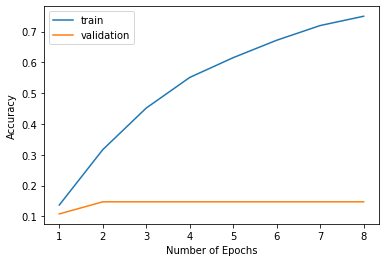

In [42]:
from IPython.core.history import HistoryAccessor
# To visualise the model3's performance

acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [43]:
# To evaluate model on test set

model3.evaluate(test_images, test_labels_encoded)

38/38 [==============================] - 0s 8ms/step - loss: 9.3706 - accuracy: 0.1338


[9.370553970336914, 0.13383838534355164]

- The test performance gives 3.5 loss and 6% accuracy

In [44]:
# To clear the backend
backend.clear_session()

In [45]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [46]:
# To instantiate the sequential model

model4 = Sequential()

# Add first conv layer with 64 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model4.add(Conv2D(64, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model4.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of second conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())

# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model4.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of third conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())

# Add the fourth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model4.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of fourth conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())

# Add the fifth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model4.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of fifth conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())

# Add the sixth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model4.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of sixth conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())

# Add the seventhth conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model4.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of seventh conv layer: pool_size of (2,2) and padding "same"
model4.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model4.add(BatchNormalization())


# Flattening the output of conv layer after max pooling to make it ready for dense connections
model4.add(Flatten())

# Add a fully connected dense layer with 128 neurons
model4.add(Dense(128, activation ="relu"))

# Add dropout layer
model4.add(Dropout(0.30))

# Add another fully connected dense layer with 128 neurons
model4.add(Dense(128, activation ="relu"))

# Add another dropout layer
model4.add(Dropout(0.30))

# Add the third fully connected dense layer with 128 neurons
model4.add(Dense(128, activation ="relu"))

# Add the third dropout layer
model4.add(Dropout(0.30))

# Add the fourth fully connected dense layer with 128 neurons
model4.add(Dense(128, activation ="relu"))

# Add the fourth dropout layer
model4.add(Dropout(0.30))

# Add the output layer with 12 neurons with softmax as activation function as this is a multi_class classification problem
model4.add(Dense(12, activation ="softmax"))

In [47]:
# To check the model summary

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [48]:
# To compile the model
model4.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [49]:
# To train the model

history4 = model4.fit(train_images, train_labels_encoded, epochs =25, batch_size =128, validation_split=0.2)

Epoch 1/25
23/23 [==============================] - 3s 105ms/step - loss: 2.4699 - accuracy: 0.1148 - val_loss: 2.4682 - val_accuracy: 0.1080
Epoch 2/25
23/23 [==============================] - 2s 90ms/step - loss: 2.3344 - accuracy: 0.1846 - val_loss: 2.4640 - val_accuracy: 0.1473
Epoch 3/25
23/23 [==============================] - 2s 90ms/step - loss: 2.0612 - accuracy: 0.3078 - val_loss: 2.4552 - val_accuracy: 0.1473
Epoch 4/25
23/23 [==============================] - 2s 91ms/step - loss: 1.7195 - accuracy: 0.3850 - val_loss: 2.6662 - val_accuracy: 0.1473
Epoch 5/25
23/23 [==============================] - 2s 90ms/step - loss: 1.5385 - accuracy: 0.4595 - val_loss: 3.6187 - val_accuracy: 0.1473
Epoch 6/25
23/23 [==============================] - 2s 90ms/step - loss: 1.3753 - accuracy: 0.5202 - val_loss: 4.6200 - val_accuracy: 0.1473
Epoch 7/25
23/23 [==============================] - 2s 90ms/step - loss: 1.2695 - accuracy: 0.5525 - val_loss: 5.2034 - val_accuracy: 0.1473
Epoch 8/25
2

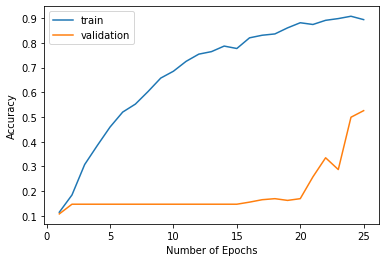

In [50]:
from IPython.core.history import HistoryAccessor
# To visualise the model2's performance

acc = history4.history["accuracy"]
val_acc = history4.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [51]:
# To evaluate model on test set

model4.evaluate(test_images, test_labels_encoded)

38/38 [==============================] - 0s 10ms/step - loss: 2.2516 - accuracy: 0.5311


[2.25163197517395, 0.5311447978019714]

# Observations

- The validation accuracy is poor for all models for small number of epochs. Since val_accuracy is poor, so also is the evaluation.

- In the first model using 3 input layers and one fully connected layer, the training accuracy gets to 100% before the validation accuracy improves. 32.9% was the val_accuracy achiveved at epochs of 25 while the training accuracy has been 100% since epochs 8. The evaluation was 29.5%.
This model over-fits.
- To imporve the first model, the hidden layers were increased to seven and 2 fully connected layers used in model 2. No imporvement in the evaluation and val-accuracy but the training accuracy was 95%.
- No improvement in the evaluation and val-accuracy with earlystopping parameter in model 3, even with lower batch size of 64.
- Model 2 was improved upon in model 4 by increasing the number of the fully connected layers to 4 with 30% dropout, the evaluation and val_accuracy increased to 53% respectively.The training accuracy was 89%. This model will generalise well at higher number of epochs.